In [105]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score,f1_score,accuracy_score,roc_auc_score,recall_score,mean_squared_error,roc_curve

<class 'pandas.core.frame.DataFrame'>
(150, 5)
iris_types [0 1 2]
y [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


超参数： [2.06913808 2.06913808 0.11288379]
y_p_log (60, 3)
调用函数auc： 0.89125
手动计算auc： 0.89125


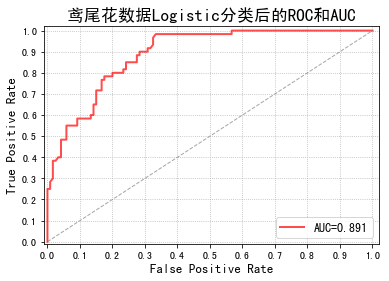

In [88]:
iris = load_iris()
d = pd.DataFrame(iris.data)
t = pd.DataFrame(iris.target)
data = pd.concat([d,t],axis=1)
print(type(data))
print(data.shape)

# data = data.reindex(columns=list(["0","1","2","3","4"]))
data.columns = ["0","1","2","3","4"]
# data.info()
np.random.seed(0)
# data = pd.read_csv('iris.data', header = None)  #读取数据


iris_types = data["4"].unique()
print("iris_types",iris_types)
n_class = iris_types.size
x = data.iloc[:, :2]  #只取前面两个特征
y = pd.Categorical(data["4"]).codes  #将标签转换0,1,...
print("y",y)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.6, random_state = 0)
y_one_hot = label_binarize(y_test, np.arange(n_class))  #装换成one_hot
# print("y_one_hot",y_one_hot)
alpha = np.logspace(-2, 2, 20)  #设置超参数范围
model = LogisticRegressionCV(Cs = alpha, cv = 3, penalty = 'l2')  #使用L2正则化
model.fit(x_train, y_train)
print('超参数：', model.C_)
# 计算属于各个类别的概率，返回值的shape = [n_samples, n_classes]
y_score = model.predict_proba(x_test)
y_pre = model.predict(x_test)

y_p_log = model.predict_log_proba(x_test)
print("y_p_log",y_p_log.shape)
# print("y_score",y_score.shape,y_score)
# print("predict.shape",model.predict(x_test).shape,model.predict(x_test))
# print("predict_log_proba.shape",y_p_log.shape,y_p_log)
# 1、调用函数计算micro类型的AUC
print('调用函数auc：', metrics.roc_auc_score(y_one_hot, y_p_log, average='micro'))
# 2、手动计算micro类型的AUC
#首先将矩阵y_one_hot和y_score展开，然后计算假正例率FPR和真正例率TPR
fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(),y_p_log.ravel())
auc = metrics.auc(fpr, tpr)
print('手动计算auc：', auc)
#绘图
mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
#FPR就是横坐标,TPR就是纵坐标
plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc)
plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'鸢尾花数据Logistic分类后的ROC和AUC', fontsize=17)
plt.show()


In [80]:

# 多分类模式下有部分计算不支持
print('recall_score',recall_score(y_test,y_pre,average='macro'))
# print('recall_score',recall_score(y_one_hot,y_p_log))
# print(y_one_hot.ravel().shape)
# print(y_p_log.ravel().shape)
print(y_test.shape)
print(y_pre.shape)
print('f1_score',f1_score(y_test,y_pre,average='micro'))
print('f1_score',f1_score(y_test,y_pre,average='macro'))
print('f1_score',f1_score(y_test,y_pre,average='weighted'))
# print('f1_score',f1_score(y_test,y_pre,average='binary'))
# print('f1_score',f1_score(y_test,y_pre,average='samples'))
# print('f1_score',f1_score(y_one_hot.ravel(),y_p_log.ravel()))
# print('accuracy_score',accuracy_score(df_wf_y.ravel(),Y_pred.ravel()))
print('accuracy_score',accuracy_score(y_test,y_pre))
print('r2_score',r2_score(y_test,y_pre))
print('r2_score',r2_score(y_one_hot.ravel(),y_p_log.ravel()))
# print('roc_auc_score',roc_auc_score(y_test,y_pre))
print('roc_auc_score',roc_auc_score(y_one_hot.ravel(),y_p_log.ravel()))
print('mean_squared_error',mean_squared_error(y_test,y_pre))
print('mean_squared_error',mean_squared_error(y_one_hot.ravel(),y_p_log.ravel()))

recall_score 0.7094547964113181
(60,)
(60,)
f1_score 0.6833333333333333
f1_score 0.7027525523766126
f1_score 0.6774902624526685
accuracy_score 0.6833333333333333
r2_score 0.48063781321184507
r2_score -28.807931903755332
roc_auc_score 0.89125
mean_squared_error 0.31666666666666665
mean_squared_error 6.6239848675011865


超参数： [61.58482111]
y_p_log.shape (14002, 2)


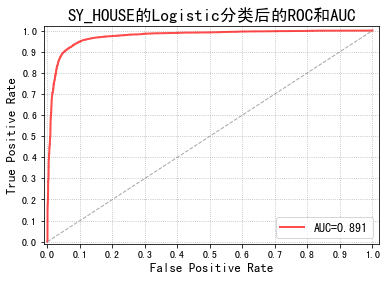

In [89]:

#二分类
# 处理原始数据，然后合并
# 读取
df_wf = pd.read_table('../Data/House_ShangYu/wufang.txt', low_memory=False, dtype=float)
df_yf = pd.read_csv('../Data/House_ShangYu/youfang.csv', low_memory=False, dtype=float)
# 填充原始nan
df_wf = df_wf.fillna(0)
df_yf = df_yf.fillna(0)
# 处理顺序
df_wf = df_wf.reindex(columns=list(["ID","SB","GJJ","NL","CL","HY","GS","SS","Y"]))
df_yf = df_yf.reindex(columns=list(["ID","SB","GJJ","NL","CL","HY","GS","SS","Y"]))
# 填充 Y 列的目标值
df_wf["Y"] = df_wf["Y"].fillna(0)
df_yf["Y"] = df_yf["Y"].fillna(1)
# 合并，有房+0.3无房
df_wf_train, df_wf_test = train_test_split(
    df_wf, test_size=0.7)

df_house = pd.concat([df_wf_train,df_yf])
df_house = df_house.sample(frac=1)

df_house_x = df_house.drop(["Y", "ID"],axis=1)
df_house_view  = df_house_x;
df_house_y = df_house['Y']

df_wf_x = df_wf.drop(["Y", "ID"],axis=1)
df_wf_view  = df_wf_x;
df_wf_y = df_wf['Y']

ss = StandardScaler()
mm = MinMaxScaler()
np_house_x = mm.fit_transform(df_house_x)
df_house_x = pd.DataFrame(np_house_x)
np_wf_x = mm.fit_transform(df_wf_x)
df_wf_x = pd.DataFrame(np_wf_x)

df_wf_y_oh = (np.arange(2) == df_wf_y[:,None]).astype(np.float32)


# print("y_one_hot",y_one_hot)
alpha = np.logspace(-2, 2, 20)  #设置超参数范围
model = LogisticRegressionCV(Cs = alpha, cv = 3, penalty = 'l2')  #使用L2正则化
model.fit(df_house_x, df_house_y)
print('超参数：', model.C_)
# 计算属于各个类别的概率，返回值的shape = [n_samples, n_classes]
y_score = model.predict_proba(df_wf_x)
y_pre = model.predict(df_wf_x)
y_p_log = model.predict_log_proba(df_wf_x)
print("y_p_log.shape",y_p_log.shape)

# print("y_score",y_score.shape,y_score)
# print("predict.shape",model.predict(x_test).shape,model.predict(x_test))
# print("predict_log_proba.shape",y_p_log.shape,y_p_log)
# 1、调用函数计算micro类型的AUC
# print('调用函数auc：', metrics.roc_auc_score(y_one_hot, y_p_log, average='micro'))
# 2、手动计算micro类型的AUC
#首先将矩阵y_one_hot和y_score展开，然后计算假正例率FPR和真正例率TPR
fpr, tpr, thresholds = metrics.roc_curve(df_wf_y_oh.ravel(),y_p_log.ravel())
# auc = metrics.auc(fpr, tpr)
# print('手动计算auc：', auc)
#绘图
mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
#FPR就是横坐标,TPR就是纵坐标
plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc)
plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'SY_HOUSE的Logistic分类后的ROC和AUC', fontsize=17)
plt.show()

In [99]:
print('recall_score',recall_score(df_wf_y,y_pre,average='macro'))
print('recall_score',recall_score(df_wf_y,y_pre,average='micro'))
print('recall_score',recall_score(df_wf_y,y_pre,average='weighted'))
print('recall_score',recall_score(df_wf_y,y_pre))
# print('recall_score',recall_score(y_one_hot,y_p_log))
# print(y_one_hot.ravel().shape)
# print(y_p_log.ravel().shape)
print(y_test.shape)
print(y_pre.shape)
print('f1_score',f1_score(df_wf_y,y_pre))
print('f1_score',f1_score(df_wf_y,y_pre,average='micro'))
print('f1_score',f1_score(df_wf_y,y_pre,average='macro'))
print('f1_score',f1_score(df_wf_y,y_pre,average='weighted'))
print('f1_score',f1_score(df_wf_y,y_pre,average='binary'))
# print('f1_score',f1_score(df_wf_y,y_pre,average='samples'))
# print('f1_score',f1_score(y_one_hot.ravel(),y_p_log.ravel()))
# print('accuracy_score',accuracy_score(df_wf_y.ravel(),Y_pred.ravel()))
print('accuracy_score',accuracy_score(df_wf_y,y_pre))
print('r2_score',r2_score(df_wf_y,y_pre))
print('r2_score',r2_score(df_wf_y_oh.ravel(),y_p_log.ravel()))
# print('roc_auc_score',roc_auc_score(y_test,y_pre))
print('roc_auc_score',roc_auc_score(df_wf_y_oh.ravel(),y_p_log.ravel()))
print('mean_squared_error',mean_squared_error(df_wf_y,y_pre))
print('mean_squared_error',mean_squared_error(df_wf_y_oh.ravel(),y_p_log.ravel()))

recall_score 0.4627910298528782
recall_score 0.9255820597057564
recall_score 0.9255820597057564
recall_score 0.0
(60,)
(14002,)
f1_score 0.0
f1_score 0.9255820597057564
f1_score 0.48067650767747205
f1_score 0.9613530153549441
f1_score 0.0
accuracy_score 0.9255820597057564
r2_score 0.0
r2_score -27.991486815180497
roc_auc_score 0.973237799950263
mean_squared_error 0.07441794029424367
mean_squared_error 7.247871703795124


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


accuracy_score 0.9593629481502642
accuracy_score 13433
s2 0.0
roc_auc 0.9593629481502641
fpr,tpr [0.         0.95936295 1.        ]
fpr.shape (3,)


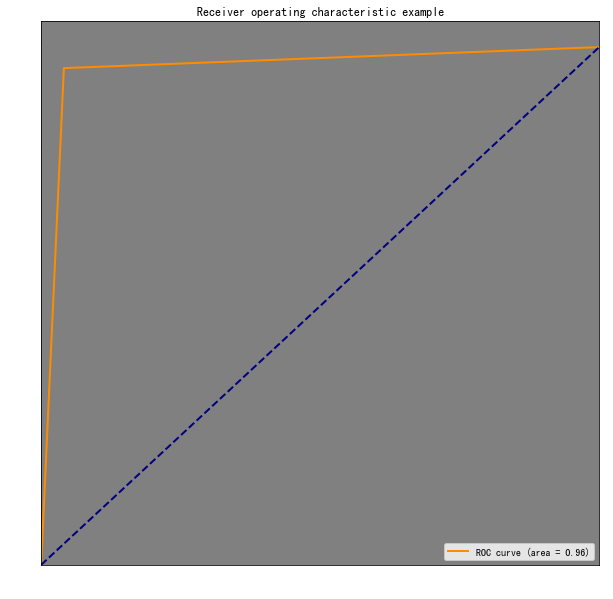

In [103]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, auc
# 回归
model_xgb = xgb.XGBRegressor(
    booster='gbtree',
    colsample_bytree=0.8,
    gamma=0.1,
    learning_rate=0.02,
    max_depth=5,
#     n_estimators=500,
    min_child_weight=0.8,
#     reg_alpha=0,
#     reg_lambda=1,
    subsample=0.8,
    silent=1,
#     random_state=42,
    nthread=2)

model_xgb.fit(df_house_x, df_house_y)

Y_pred = model_xgb.predict(df_wf_x)
threshold = 0.5
y_pre = np.array([int(item>threshold) for  item in Y_pred])

print('accuracy_score',accuracy_score(df_wf_y, y_pre))
# normalize：默认值为True，返回正确分类的比例；如果为False，返回正确分类的样本数
print('accuracy_score',accuracy_score(df_wf_y, y_pre , normalize=False))
s2 = model_xgb.score(df_wf_x, df_wf_y)
print('s2',s2)


df_wf_y_oh = (np.arange(2) == df_wf_y[:,None]).astype(np.float32)
y_pre_oh = (np.arange(2) == y_pre[:,None]).astype(np.float32)



# print(Y_pred)

# Y_pred.itemset(1, 2)
# Y_pred.itemset(0, 1)
# Y_pred.itemset(2, 0)
# Y_pred = 1 - Y_pred
# np_wf_y = np.array(df_wf_y)
# np_wf_y.itemset(0, 1)

fpr,tpr,threshold = roc_curve(df_wf_y_oh.ravel(), y_pre_oh.ravel())
roc_auc = auc(fpr,tpr)
print('roc_auc',roc_auc)
print('fpr,tpr',tpr)
print('fpr.shape',fpr.shape)

lw = 2
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.set_facecolor('gray')
# ax.set_xlabel('fpr') 
# ax.set_ylabel('tpr') 

# 边框颜色
# ax.spines['bottom'].set_color('red') 
# ax.spines['top'].set_color('g') 
# 标签颜色
ax.xaxis.label.set_color('w') 
ax.yaxis.label.set_color('w') 

# 坐标轴颜色
ax.tick_params(axis='x', colors='w') 
ax.tick_params(axis='y', colors='w') 
# fig.patch.set_facecolor('black')

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [104]:
print('recall_score',recall_score(df_wf_y,y_pre,average='macro'))
print('recall_score',recall_score(df_wf_y,y_pre,average='micro'))
print('recall_score',recall_score(df_wf_y,y_pre,average='weighted'))
print('recall_score',recall_score(df_wf_y,y_pre))
# print('recall_score',recall_score(y_one_hot,y_p_log))
# print(y_one_hot.ravel().shape)
# print(y_p_log.ravel().shape)
print(y_test.shape)
print(y_pre.shape)
print('f1_score',f1_score(df_wf_y,y_pre))
print('f1_score',f1_score(df_wf_y,y_pre,average='micro'))
print('f1_score',f1_score(df_wf_y,y_pre,average='macro'))
print('f1_score',f1_score(df_wf_y,y_pre,average='weighted'))
print('f1_score',f1_score(df_wf_y,y_pre,average='binary'))
# print('f1_score',f1_score(df_wf_y,y_pre,average='samples'))
# print('f1_score',f1_score(y_one_hot.ravel(),y_p_log.ravel()))
# print('accuracy_score',accuracy_score(df_wf_y.ravel(),Y_pred.ravel()))
print('accuracy_score',accuracy_score(df_wf_y,y_pre))
print('r2_score',r2_score(df_wf_y,y_pre))
print('r2_score',r2_score(df_wf_y_oh.ravel(),y_p_log.ravel()))
# print('roc_auc_score',roc_auc_score(y_test,y_pre))
print('roc_auc_score',roc_auc_score(df_wf_y_oh.ravel(),y_p_log.ravel()))
print('mean_squared_error',mean_squared_error(df_wf_y,y_pre))
print('mean_squared_error',mean_squared_error(df_wf_y_oh.ravel(),y_p_log.ravel()))

recall_score 0.4796814740751321
recall_score 0.9593629481502642
recall_score 0.9593629481502642
recall_score 0.0
(60,)
(14002,)
f1_score 0.0
f1_score 0.9593629481502642
f1_score 0.4896300346273009
f1_score 0.979260069254602
f1_score 0.0
accuracy_score 0.9593629481502642
r2_score 0.0
r2_score -27.991486815180497
roc_auc_score 0.973237799950263
mean_squared_error 0.040637051849735754
mean_squared_error 7.247871703795124


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
